# Imports

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Input

In [4]:
df = pd.read_csv("input/data.csv", index_col=False)
df.head()

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,CITY_NAME
0,3.159672e+08,00000000-0000-0000-0000-000000000000,AV,2183.412276,724.388351,PIT
1,3.159672e+08,00000000-0000-0000-0000-000000006508,OTHERS,2159.402694,711.473119,PIT
2,3.159672e+08,00000000-0000-0000-0000-000000006293,OTHERS,2229.611668,762.482721,PIT
3,3.159672e+08,00000000-0000-0000-0000-000000006566,OTHERS,2240.571538,768.533941,PIT
4,3.159672e+08,00000000-0000-0000-0000-000000006585,OTHERS,2190.728600,730.459119,PIT


In [10]:
df['LABEL'] = df['TRACK_ID'].str.split('-').str[-1] + ' (' + df['OBJECT_TYPE'] + ')'
df.head()

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,CITY_NAME,LABEL
0,3.159672e+08,00000000-0000-0000-0000-000000000000,AV,2183.412276,724.388351,PIT,000000000000 (AV)
1,3.159672e+08,00000000-0000-0000-0000-000000006508,OTHERS,2159.402694,711.473119,PIT,000000006508 (OTHERS)
2,3.159672e+08,00000000-0000-0000-0000-000000006293,OTHERS,2229.611668,762.482721,PIT,000000006293 (OTHERS)
3,3.159672e+08,00000000-0000-0000-0000-000000006566,OTHERS,2240.571538,768.533941,PIT,000000006566 (OTHERS)
4,3.159672e+08,00000000-0000-0000-0000-000000006585,OTHERS,2190.728600,730.459119,PIT,000000006585 (OTHERS)


# Plot

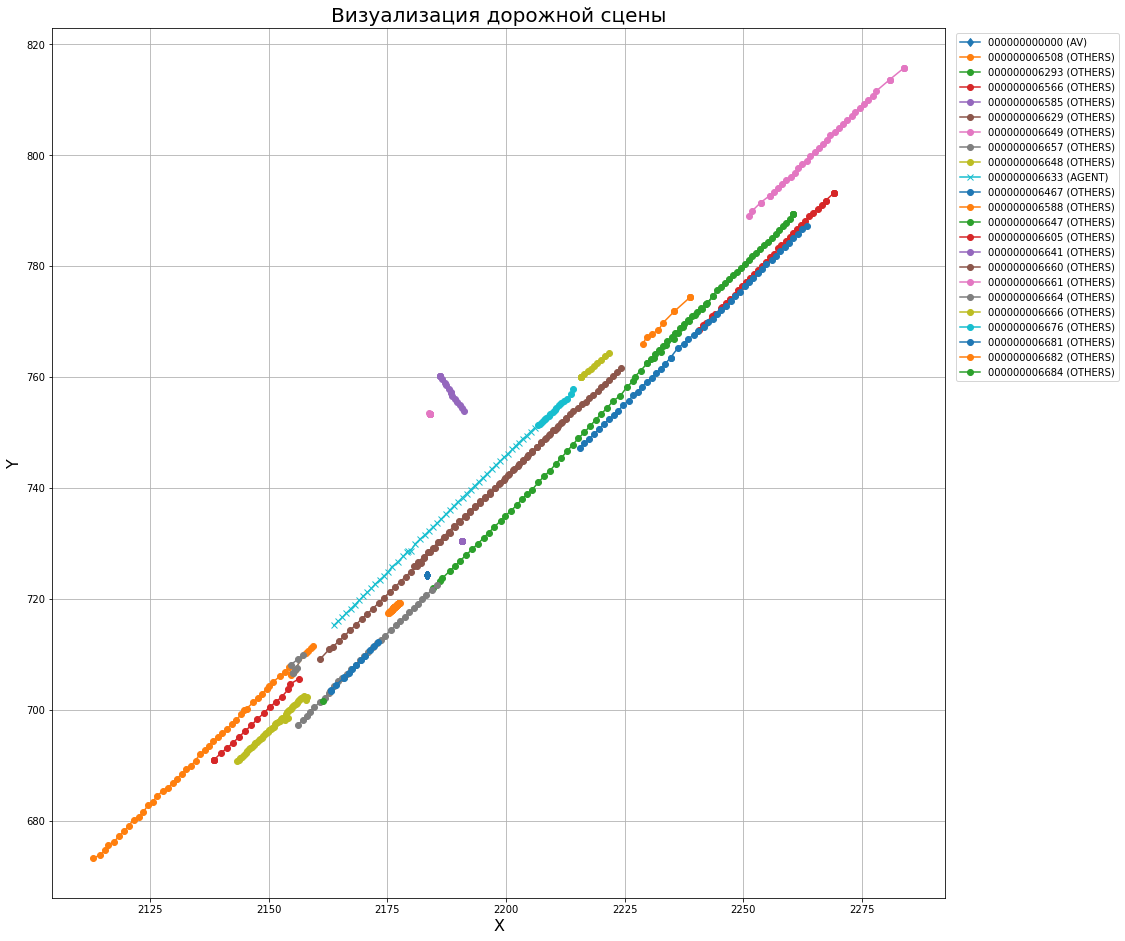

In [38]:
fig, ax = plt.subplots(1, figsize=(16, 16))
markers = {'AV': 'd', 'AGENT': 'x', 'OTHERS': 'o'}

for obj in df['TRACK_ID'].unique():
    data = df[df['TRACK_ID'] == obj][['OBJECT_TYPE', 'X', 'Y']]
    obj_type = data['OBJECT_TYPE'].iloc[0]
    ax.plot(data['X'], data['Y'], marker=markers[obj_type])

ax.grid()
ax.set_title('Визуализация дорожной сцены', fontsize=20)
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.legend(df['LABEL'].unique(), loc='upper right', bbox_to_anchor=(1.2, 1))

plt.savefig("output/scene.png", dpi=300, bbox_inches='tight')